# <center> Player Selection

#### Predict whether a player is selected

Sportsmanship comes in many forms and helps make competitive games fun and enjoyable. Being a good sport fosters good habits and positive life skills both in and out of sports games and is an important life skill for people of all ages. Apart from this. It is also important that a sportsperson is fit (specific fitness parameters apply to specific sports) to allow them to contribute maximum towards the sport.

#### Task
You work for a sports institution. There is a national-level competition next month and you must select players based on fitness level, behavioral aspects, physical parameters, etc.
 
Predict whether a player will be selected based on the features provided in the dataset

### Table of Contents

- 1. [Project Objective](#1)
- 2. [Domain Analysis](#2)
- 3. [Import the required libraries](#3)
- 4. [Data Preparation](#4)
- 5. [Data Preprocessing](#5)
- 6. [Model Building and Evaluation](#6)
- 7. [Prediction](#7)

<a name='1'></a>
### 1. [Project Objective](#1)
The objective of this project is to build a model that predicts whether a player will be selected for a national-level sports competition. The prediction will be based on various features provided in the dataset, including fitness level, behavioral aspects, physical parameters, and more.

<a name='1'></a>
### 2. [Domain Analysis](#2)


##### Dataset Overview
The dataset contains information on potential players, including their fitness levels, skill assessments, behavioral attributes, injury history, medical status, and more. Each record in the dataset corresponds to an individual player.

##### Key Domains for Player Selection
In order to make informed selections, the following key domains will be considered:

1. **Fitness Level Assessment:**
   - Assessing the physical fitness of players, including endurance, strength, speed, agility, and flexibility.

2. **Skill and Performance Evaluation:**
   - Analyzing players' proficiency in the specific sport, as well as their performance metrics.

3. **Behavioral and Psychological Aspects:**
   - Evaluating mental toughness, team compatibility, leadership, and sportsmanship.

4. **Injury History and Physical Parameters:**
   - Assessing injury history and relevant physical parameters.

5. **Medical and Health Assessment:**
   - Ensuring players are medically fit to compete and are in compliance with anti-doping regulations.

6. **Age and Eligibility:**
   - Verifying players' ages and eligibility for the competition.

7. **Ethical Considerations:**
   - Conducting background checks to maintain ethical and legal standards.

8. **Coaching and Selection Committees:**
   - Assembling a committee of experts for collective evaluation.

9. **Competition Rules and Regulations:**
   - Adhering to the rules and regulations of the specific sport and competition.

10. **Data Analysis and Decision-Making:**
    - Using data analysis to make data-driven selections.

11. **Scouting and Talent Identification:**
    - Identifying promising players through scouting.

12. **Communication and Transparency:**
    - Maintaining open communication with stakeholders.

13. **Logistics and Planning:**
    - Planning for player accommodations and training camps.

##### Data Preprocessing
Before building the prediction model, data preprocessing steps will be applied to clean, transform, and prepare the dataset. This may include handling missing values, encoding categorical variables, and scaling features.

##### Model Building
The next steps in this project will involve building a predictive model using machine learning algorithms. Various models, such as logistic regression, decision trees, random forests, or neural networks, will be considered for predicting player selection.

##### Evaluation Metrics
The model's performance will be assessed using appropriate evaluation metrics, such as accuracy, precision, recall, F1-score, and ROC-AUC, to determine its effectiveness in predicting player selection.

##### Conclusion
The domain analysis document provides an overview of the project's objectives, the dataset, the key domains considered for player selection, data preprocessing steps, model building, and evaluation metrics. This document serves as a reference for the entire project, ensuring a systematic approach to player selection prediction.

Now, let's proceed with data preprocessing and model building.

<a name='3'></a>
### 3. [Import the required libraries](#3)

In [1]:
import numpy as np
import pandas as pd
import math
import klib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix , accuracy_score, precision_score, recall_score, f1_score,classification_report
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

import warnings
warnings.filterwarnings('ignore')

<a name='4'></a>
### 4. [Data Preprocessing](#4)

In [2]:
# Load the train and test dataset into a pandas DataFrame
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
# Display the first few rows of the train dataset to get an overview
train.head(5)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,Keva Horan,23,M,Ukraine,6'2,176lbs,77.0,58.0,47.0,...,Right,7.7,NaN,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,Herma Tann,18,M,Russia,5'10,148lbs,54.0,69.0,70.0,...,Any,5.3,0.0,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,Eilene Kizer,16,F,Spain,6'2,172lbs,34.0,43.0,45.0,...,Left,4.7,0.0,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,Andrea Badgett,27,M,Chile,5'11,165lbs,79.0,73.0,76.0,...,Right,8.6,113.0,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,Jeremiah Bumbalough,19,F,Argentina,5'8,158lbs,47.0,61.0,74.0,...,Right,NaN,0.0,5.7,5.0,Medium,Academy,4.0,0.0,0


In [4]:
# Display the first few rows of the test dataset to get an overview
test.head(5)

,player_id,name,age,gender,country,height,weight,ball_controlling_skills,body_reflexes,body_balance,...,max_running_speed,strong_foot,behaviour_rating,matches_played,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,PLID_14644,Ha Matta,16,F,Austria,6'1,163lbs,68.0,68.0,54.0,...,25.6,Right,6.5,0.0,7.7,3.0,Medium,Unknown,1.0,0.0
1,PLID_5934,Rex Weinstock,23,F,South Africa,5'9,170lbs,65.0,73.0,78.0,...,27.6,Right,5.1,1.0,6.1,3.0,Medium,Academy,9.0,0.0
2,PLID_5074,Raisa Angeles,18,F,Netherlands,5'10,154lbs,72.0,79.0,64.0,...,29.4,Left,5.8,0.0,8.4,2.0,Medium,Academy,3.0,0.0
3,PLID_17357,Jong Flewelling,24,F,China PR,6'0,168lbs,64.0,76.0,65.0,...,23.0,Right,5.2,0.0,6.2,6.0,High,Academy,10.0,0.0
4,PLID_13993,Dian Westmoreland,20,F,Australia,6'0,163lbs,53.0,58.0,57.0,...,23.2,Right,4.7,0.0,6.9,3.0,Medium,Talent Hunt,5.0,0.0


In [5]:
# Get the shape of the train and test dataset (number of rows and columns)
print("Train dataset shape:", train.shape)
print("Test dataset shape:", test.shape)

Train dataset shape: (13994, 30)
Test dataset shape: (9330, 29)


In [6]:
# Get the train and test dataset column names (features)
print("Train dataset feature names:", train.columns,'\n')
print("Test dataset feature names:", test.columns)

Train dataset feature names: Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_strength_stamina',
       'max_running_speed', 'strong_foot', 'behaviour_rating',
       'matches_played', 'fitness_rating', 'trophies_won', 'dedication_level',
       'coaching', 'years_of_experience', 'no_of_disqualifications',
       'selection'],
      dtype='object') 

Test dataset feature names: Index(['player_id', 'name', 'age', 'gender', 'country', 'height', 'weight',
       'ball_controlling_skills', 'body_reflexes', 'body_balance',
       'jumping_skills', 'penalties_conversion_rate', 'mental_strength',
       'goalkeeping_skills', 'defending_skills', 'passing_skills',
       'dribbling_skills', 'shot_accuracy', 'body_st

**Target Variable**<br>
The **Selection column** is the target variable for this dataset.

In [7]:
# Getting information of the train dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13994 entries, 0 to 13993
Data columns (total 30 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  13994 non-null  object 
 1   name                       13994 non-null  object 
 2   age                        13994 non-null  int64  
 3   gender                     13975 non-null  object 
 4   country                    13994 non-null  object 
 5   height                     13994 non-null  object 
 6   weight                     13577 non-null  object 
 7   ball_controlling_skills    13581 non-null  float64
 8   body_reflexes              13994 non-null  float64
 9   body_balance               13994 non-null  float64
 10  jumping_skills             13970 non-null  float64
 11  penalties_conversion_rate  13964 non-null  float64
 12  mental_strength            13966 non-null  float64
 13  goalkeeping_skills         13994 non-null  flo

In [8]:
# Getting information of the test dataset
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9330 entries, 0 to 9329
Data columns (total 29 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   player_id                  9330 non-null   object 
 1   name                       9330 non-null   object 
 2   age                        9330 non-null   int64  
 3   gender                     9310 non-null   object 
 4   country                    9330 non-null   object 
 5   height                     9330 non-null   object 
 6   weight                     9059 non-null   object 
 7   ball_controlling_skills    9060 non-null   float64
 8   body_reflexes              9330 non-null   float64
 9   body_balance               9330 non-null   float64
 10  jumping_skills             9308 non-null   float64
 11  penalties_conversion_rate  9314 non-null   float64
 12  mental_strength            9312 non-null   float64
 13  goalkeeping_skills         9330 non-null   float

In [9]:
# Get summary statistics for numerical columns for train dataset
train.describe().T

,count,mean,std,min,25%,50%,75%,max
age,13994.0,21.135844,5.162719,16.0,17.0,20.0,24.0,61.0
ball_controlling_skills,13581.0,56.043958,16.787353,5.0,51.0,61.0,67.0,95.0
body_reflexes,13994.0,61.934329,14.931963,12.0,54.0,64.0,72.0,96.0
body_balance,13994.0,62.753323,14.203638,9.0,55.0,65.0,73.0,97.0
jumping_skills,13970.0,63.612026,11.938712,14.0,57.0,64.0,72.0,95.0
penalties_conversion_rate,13964.0,48.495703,15.767506,7.0,39.0,49.0,60.0,92.0
mental_strength,13966.0,56.768366,11.977744,9.0,49.0,58.0,65.0,92.0
goalkeeping_skills,13994.0,16.474632,16.874551,1.0,10.0,11.0,12.0,88.0
defending_skills,13994.0,48.108118,16.821929,9.0,36.0,52.0,61.0,86.0
passing_skills,13994.0,52.935973,14.201782,13.0,45.0,56.0,63.0,89.0


In [10]:
# Get summary statistics for numerical columns for test dataset
test.describe().T

,count,mean,std,min,25%,50%,75%,max
age,9330.0,21.167631,5.107797,16.0,17.0,20.0,24.0,60.0
ball_controlling_skills,9060.0,56.144923,16.666428,4.0,51.0,61.0,67.0,95.0
body_reflexes,9330.0,61.944051,14.791765,12.0,54.0,64.0,72.0,95.0
body_balance,9330.0,62.620472,14.228820,13.0,54.0,65.0,73.0,96.0
jumping_skills,9308.0,63.514289,11.993422,12.0,56.0,64.0,72.0,95.0
penalties_conversion_rate,9314.0,48.297616,15.665422,5.0,39.0,49.0,60.0,90.0
mental_strength,9312.0,57.000107,11.679550,3.0,50.0,58.0,65.0,93.0
goalkeeping_skills,9330.0,16.517363,16.956186,1.0,10.0,11.0,12.0,89.0
defending_skills,9330.0,48.193569,16.836169,8.0,36.0,52.0,62.0,83.0
passing_skills,9330.0,53.001393,14.085740,9.0,45.0,56.0,63.0,92.0


In [11]:
# Check the unique values in the target column of 'selection'
print("Unique values in the target column:", train['selection'].unique())

Unique values in the target column: [1 0]


In [12]:
# Unique values in train dataset
train.nunique()

player_id                    13994
name                         13994
age                             39
gender                           2
country                        163
height                          31
weight                          88
ball_controlling_skills         89
body_reflexes                   84
body_balance                    86
jumping_skills                  74
penalties_conversion_rate       86
mental_strength                 83
goalkeeping_skills              65
defending_skills                78
passing_skills                  77
dribbling_skills                48
shot_accuracy                   79
body_strength_stamina           73
max_running_speed              166
strong_foot                      3
behaviour_rating                64
matches_played                  18
fitness_rating                  85
trophies_won                    10
dedication_level                 3
coaching                         4
years_of_experience             25
no_of_disqualificati

In [13]:
# Unique values in test dataset
test.nunique()

player_id                    9330
name                         9330
age                            35
gender                          2
country                       148
height                         29
weight                         86
ball_controlling_skills        90
body_reflexes                  82
body_balance                   82
jumping_skills                 73
penalties_conversion_rate      82
mental_strength                82
goalkeeping_skills             60
defending_skills               76
passing_skills                 79
dribbling_skills               48
shot_accuracy                  79
body_strength_stamina          67
max_running_speed             162
strong_foot                     3
behaviour_rating               66
matches_played                 17
fitness_rating                 84
trophies_won                   10
dedication_level                3
coaching                        4
years_of_experience            24
no_of_disqualifications        15
dtype: int64

<a name='5'></a>
### 5. [Data Preprocessing](#5)

In [14]:
# Check for duplicates records in train dataset
duplicates = train.duplicated()

# Count the number of duplicate records
num_duplicates = duplicates.sum()

print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


In [15]:
# Check for duplicates records in test dataset
duplicates = test.duplicated()

# Count the number of duplicate records
num_duplicates = duplicates.sum()

print("Number of duplicate records:", num_duplicates)

Number of duplicate records: 0


In [16]:
# Count and display the number of missing values in each column of the 'train' dataset
train.isna().sum()

player_id                       0
name                            0
age                             0
gender                         19
country                         0
height                          0
weight                        417
ball_controlling_skills       413
body_reflexes                   0
body_balance                    0
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection     

In [17]:
# Calculate the number of missing values in each column in train dataset
train.isna().sum()/ len(train) * 100

player_id                     0.000000
name                          0.000000
age                           0.000000
gender                        0.135772
country                       0.000000
height                        0.000000
weight                        2.979849
ball_controlling_skills       2.951265
body_reflexes                 0.000000
body_balance                  0.000000
jumping_skills                0.171502
penalties_conversion_rate     0.214378
mental_strength               0.200086
goalkeeping_skills            0.000000
defending_skills              0.000000
passing_skills                0.000000
dribbling_skills              0.000000
shot_accuracy                 4.087466
body_strength_stamina         0.000000
max_running_speed             0.000000
strong_foot                  13.098471
behaviour_rating              5.023582
matches_played                4.759183
fitness_rating                4.966414
trophies_won                  0.000000
dedication_level         

In [18]:
# Count and display the number of missing values in each column of the 'test' dataset
test.isna().sum()

player_id                       0
name                            0
age                             0
gender                         20
country                         0
height                          0
weight                        271
ball_controlling_skills       270
body_reflexes                   0
body_balance                    0
jumping_skills                 22
penalties_conversion_rate      16
mental_strength                18
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 342
body_strength_stamina           0
max_running_speed               0
strong_foot                  1210
behaviour_rating              442
matches_played                471
fitness_rating                438
trophies_won                    0
dedication_level                0
coaching                       87
years_of_experience            89
no_of_disqualifications         0
dtype: int64

In [19]:
# Calculate the number of missing values in each column in test dataset
test.isna().sum()/ len(train) * 100

player_id                    0.000000
name                         0.000000
age                          0.000000
gender                       0.142918
country                      0.000000
height                       0.000000
weight                       1.936544
ball_controlling_skills      1.929398
body_reflexes                0.000000
body_balance                 0.000000
jumping_skills               0.157210
penalties_conversion_rate    0.114335
mental_strength              0.128627
goalkeeping_skills           0.000000
defending_skills             0.000000
passing_skills               0.000000
dribbling_skills             0.000000
shot_accuracy                2.443905
body_strength_stamina        0.000000
max_running_speed            0.000000
strong_foot                  8.646563
behaviour_rating             3.158496
matches_played               3.365728
fitness_rating               3.129913
trophies_won                 0.000000
dedication_level             0.000000
coaching    

In [20]:
# Identify categorical columns in the 'train' dataset
categorical_columns = train.select_dtypes(include=['object']).columns.tolist()
print('Categorical features are:', categorical_columns)

Categorical features are: ['player_id', 'name', 'gender', 'country', 'height', 'weight', 'strong_foot', 'dedication_level', 'coaching']


In [21]:
# Identify categorical columns in the 'test' dataset
categorical_columns = test.select_dtypes(include=['object']).columns.tolist()
print('Categorical features are:', categorical_columns)

Categorical features are: ['player_id', 'name', 'gender', 'country', 'height', 'weight', 'strong_foot', 'dedication_level', 'coaching']


In [22]:
# Count the unique values in each categorical feature in train dataset
unique_categories_count = {col: train[col].nunique() for col in categorical_columns}
unique_categories_count

{'player_id': 13994,
 'name': 13994,
 'gender': 2,
 'country': 163,
 'height': 31,
 'weight': 88,
 'strong_foot': 3,
 'dedication_level': 3,
 'coaching': 4}

In [23]:
# Count the unique values in each categorical feature in test dataset
unique_categories_count = {col: test[col].nunique() for col in categorical_columns}
unique_categories_count

{'player_id': 9330,
 'name': 9330,
 'gender': 2,
 'country': 148,
 'height': 29,
 'weight': 86,
 'strong_foot': 3,
 'dedication_level': 3,
 'coaching': 4}

In [24]:
# Identify numerical columns in the 'train' dataset
numerical_columns = train.select_dtypes(exclude=['object']).columns.tolist()
print('Numerical features are:', numerical_columns)

Numerical features are: ['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications', 'selection']


In [25]:
# Identify numerical columns in the 'test' dataset
numerical_columns = test.select_dtypes(exclude=['object']).columns.tolist()
print('Numerical features are:', numerical_columns)

Numerical features are: ['age', 'ball_controlling_skills', 'body_reflexes', 'body_balance', 'jumping_skills', 'penalties_conversion_rate', 'mental_strength', 'goalkeeping_skills', 'defending_skills', 'passing_skills', 'dribbling_skills', 'shot_accuracy', 'body_strength_stamina', 'max_running_speed', 'behaviour_rating', 'matches_played', 'fitness_rating', 'trophies_won', 'years_of_experience', 'no_of_disqualifications']


### 5.1 [Exploratory Data Analysis](#0)

**Comprehensive Exploration of Numerical Features: Uncovering Insights and Patterns**

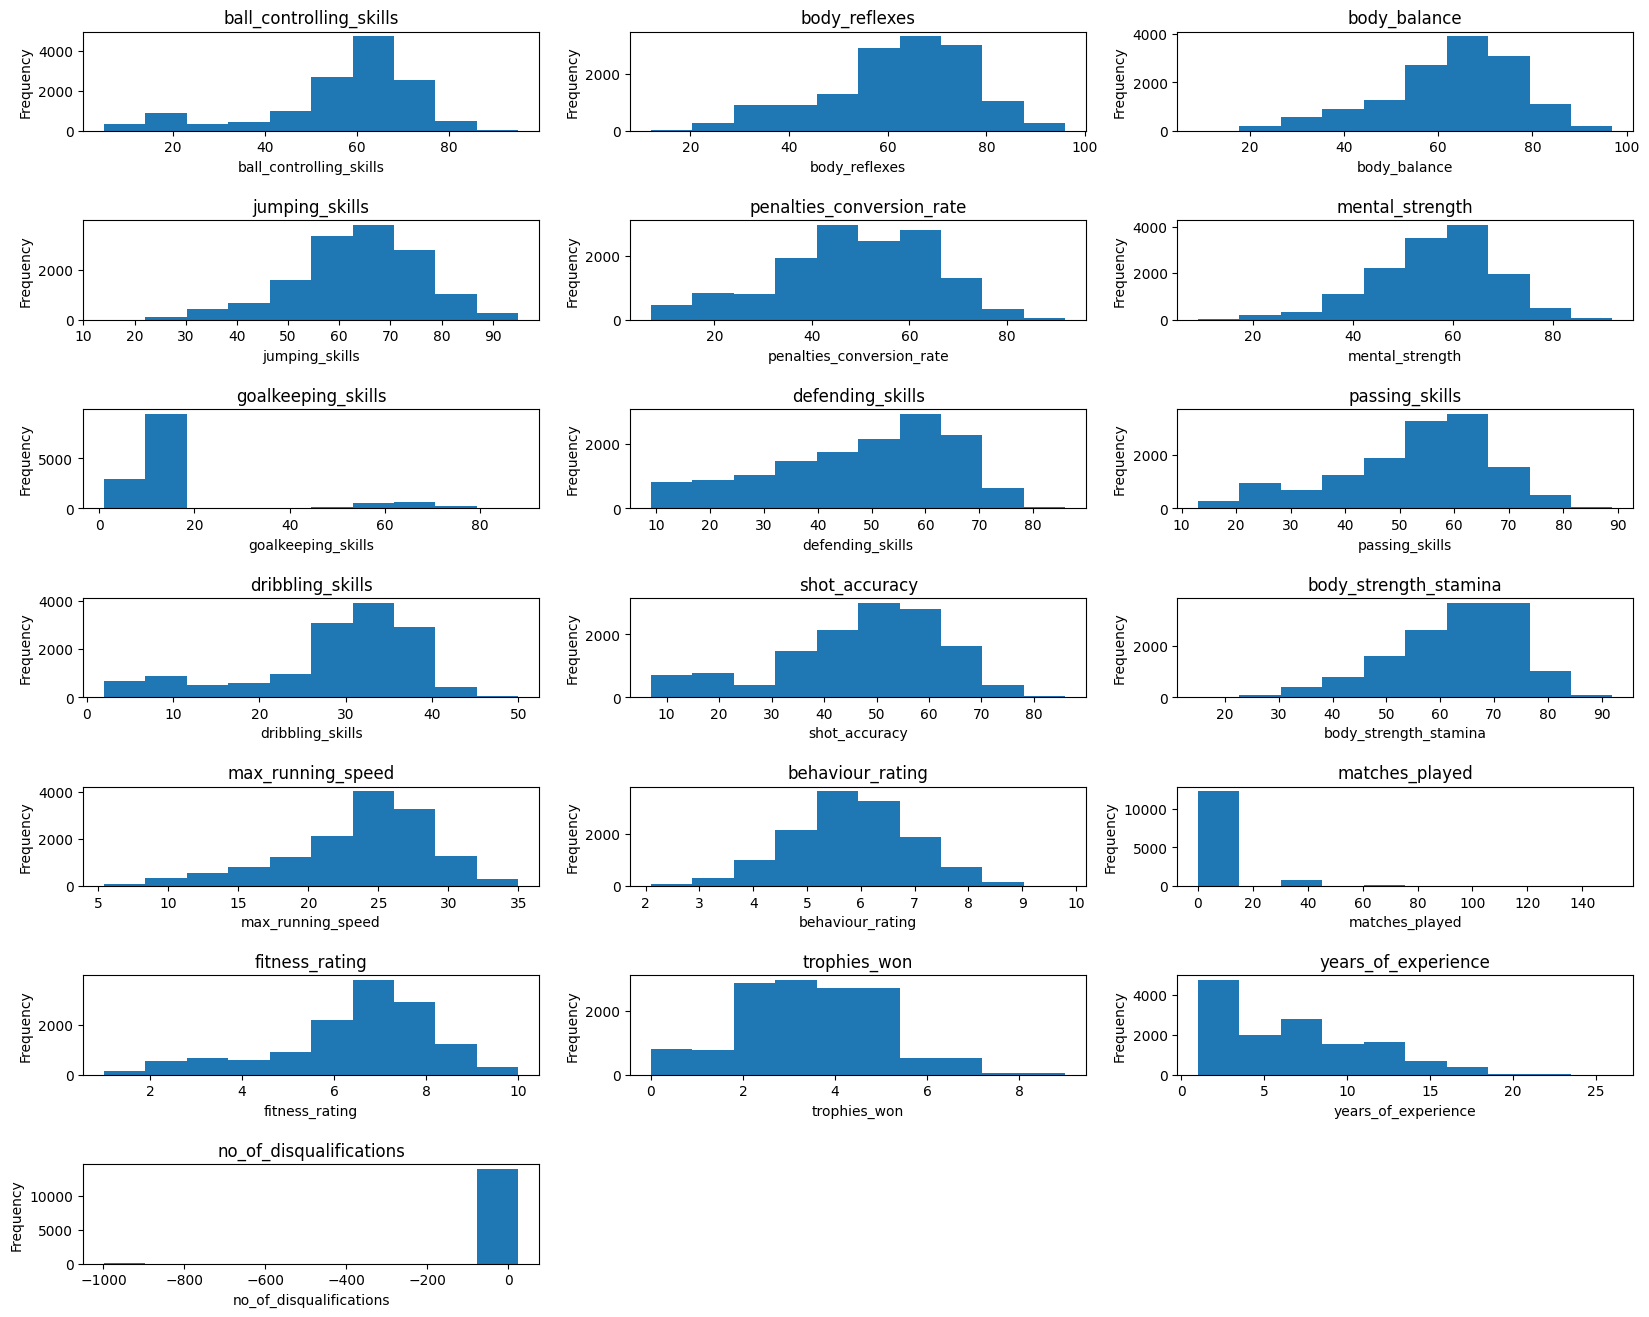

In [26]:
# Select only numerical columns (float)
freq = train.select_dtypes(include=['float'])

# Calculate the number of rows and columns for subplots
num_cols = len(freq.columns)
num_rows = math.ceil(num_cols / 3)

# Create a subplot grid to display histograms of each column
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(20, 16))
fig.subplots_adjust(hspace=0.9)

# Loop through the numerical columns and plot histograms
for i, col in enumerate(freq.columns):
    ax = axes[i // 3, i % 3]
    freq[col].plot(kind='hist', ax=ax, title=col)
    ax.set_xlabel(col)

# Remove any empty subplots
for i in range(num_cols, num_rows * 3):
    fig.delaxes(axes[i // 3, i % 3])

plt.show()

**Exploring the distribution of features and Handling Missing Values in Dataset Features**

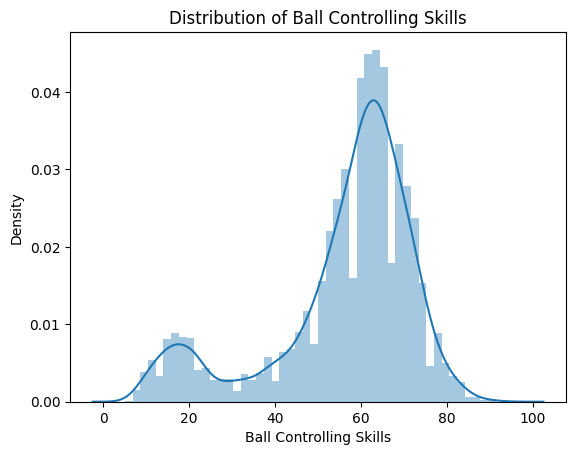

In [27]:
# Visualize the distribution of the 'ball_controlling_skills' feature
sns.distplot(train['ball_controlling_skills'])

# Set plot labels and title
plt.xlabel('Ball Controlling Skills')
plt.ylabel('Density')
plt.title('Distribution of Ball Controlling Skills')

# Show the plot
plt.show()

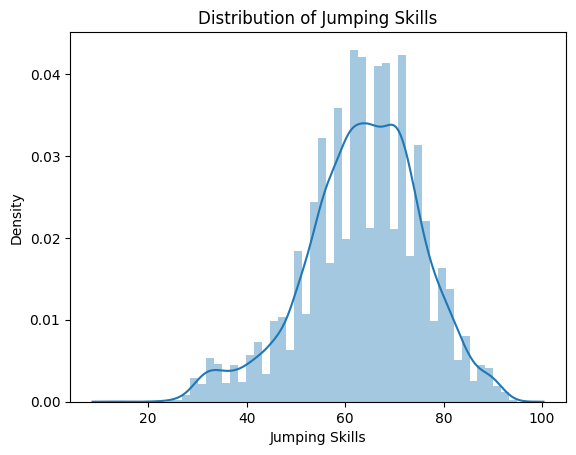

In [28]:
# Visualizing the Distribution of 'jumping_skills'
sns.distplot(train['jumping_skills'])

# Set plot labels and title
plt.xlabel('Jumping Skills')
plt.ylabel('Density')
plt.title('Distribution of Jumping Skills')

# Show the plot
plt.show()

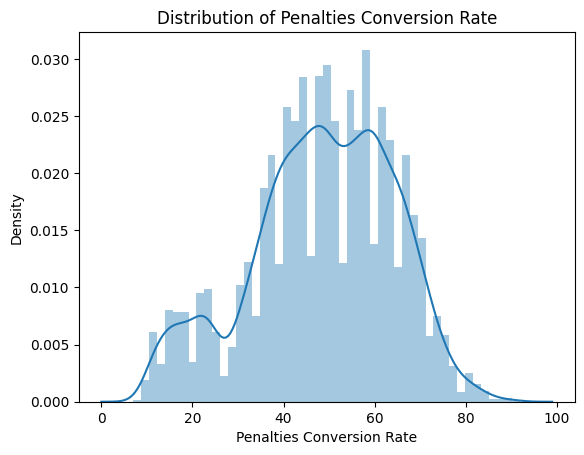

In [29]:
# Visualizing the Distribution of 'penalties_conversion_rate'
sns.distplot(train['penalties_conversion_rate'])

# Set plot labels and title
plt.xlabel('Penalties Conversion Rate')
plt.ylabel('Density')
plt.title('Distribution of Penalties Conversion Rate')

# Show the plot
plt.show()

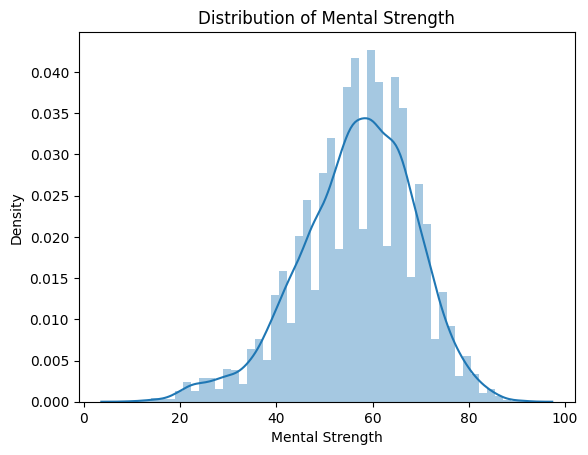

In [30]:
# Visualizing the Distribution of 'mental_strength'
sns.distplot(train['mental_strength'])

# Set plot labels and title
plt.xlabel('Mental Strength')
plt.ylabel('Density')
plt.title('Distribution of Mental Strength')

# Show the plot
plt.show()

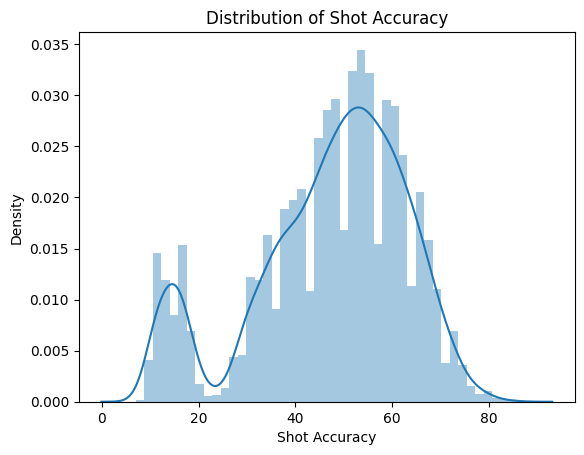

In [31]:
# Visualizing the Distribution of 'shot_accuracy'
sns.distplot(train['shot_accuracy'])

# Set plot labels and title
plt.xlabel('Shot Accuracy')
plt.ylabel('Density')
plt.title('Distribution of Shot Accuracy')

# Show the plot
plt.show()

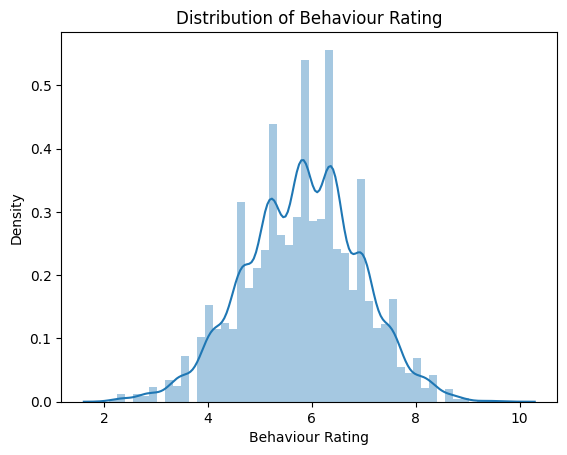

In [32]:
# Visualizing the Distribution of 'behaviour_rating'
sns.distplot(train['behaviour_rating'])

# Set plot labels and title
plt.xlabel('Behaviour Rating')
plt.ylabel('Density')
plt.title('Distribution of Behaviour Rating')

# Show the plot
plt.show()

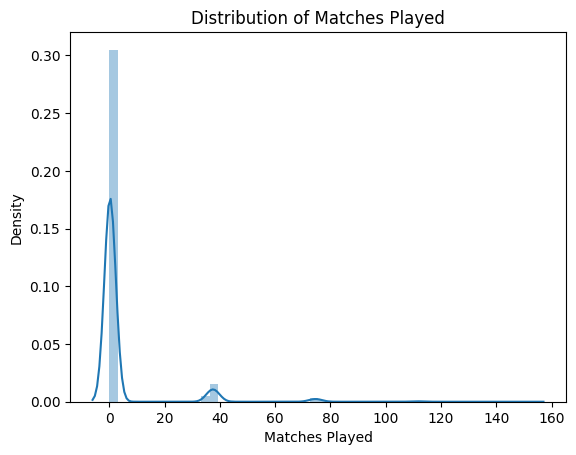

In [33]:
# Visualizing the Distribution of 'matches_played'
sns.distplot(train['matches_played'])

# Set plot labels and title
plt.xlabel('Matches Played')
plt.ylabel('Density')
plt.title('Distribution of Matches Played')

# Show the plot
plt.show()

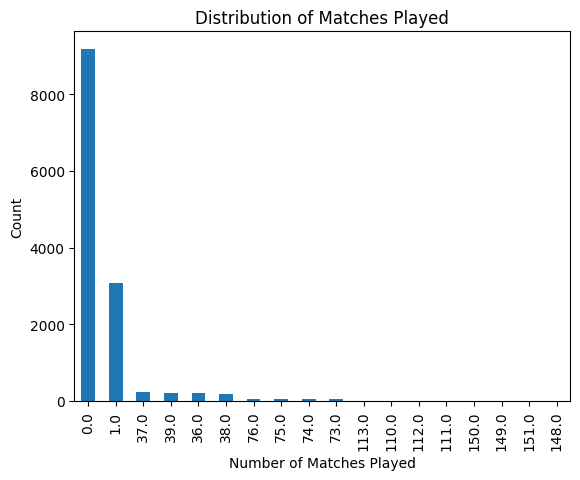

In [34]:
# Count unique values
matches_played_counts = train['matches_played'].value_counts()

# Create a bar plot
matches_played_counts.plot(kind='bar')
plt.title('Distribution of Matches Played')
plt.xlabel('Number of Matches Played')
plt.ylabel('Count')
plt.show()

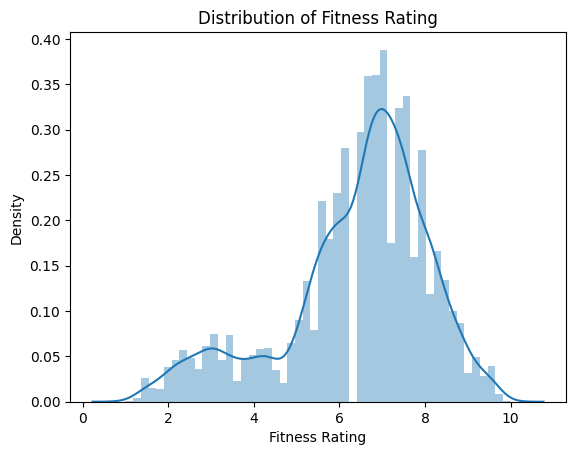

In [35]:
# Visualizing the Distribution of 'fitness_rating'
sns.distplot(train['fitness_rating'])

# Set plot labels and title
plt.xlabel('Fitness Rating')
plt.ylabel('Density')
plt.title('Distribution of Fitness Rating')

# Show the plot
plt.show()

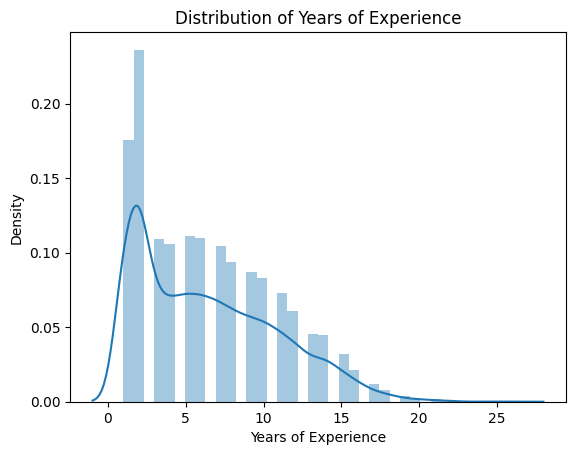

In [36]:
# Visualizing the Distribution of 'years_of_experience'
sns.distplot(train['years_of_experience'])

# Set plot labels and title
plt.xlabel('Years of Experience')
plt.ylabel('Density')
plt.title('Distribution of Years of Experience')

# Show the plot
plt.show()

In [37]:
train['years_of_experience'].value_counts()

years_of_experience
2.0     2151
1.0     1601
5.0     1014
6.0     1000
3.0      993
4.0      963
7.0      949
8.0      856
9.0      792
10.0     755
11.0     662
12.0     555
13.0     411
14.0     407
15.0     291
16.0     192
17.0     106
18.0      69
19.0      34
20.0      23
21.0      14
22.0       8
25.0       2
24.0       1
26.0       1
Name: count, dtype: int64

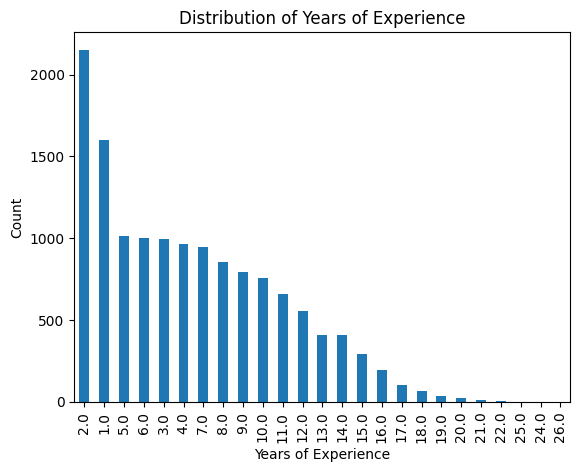

In [38]:
# Count unique values
matches_played_counts = train['years_of_experience'].value_counts()

# Create a bar plot
matches_played_counts.plot(kind='bar')
plt.title('Distribution of Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Count')
plt.show()

**Comprehensive Exploration of Categorical Features: Uncovering Insights and Patterns**

selection
1    7802
0    6192
Name: count, dtype: int64


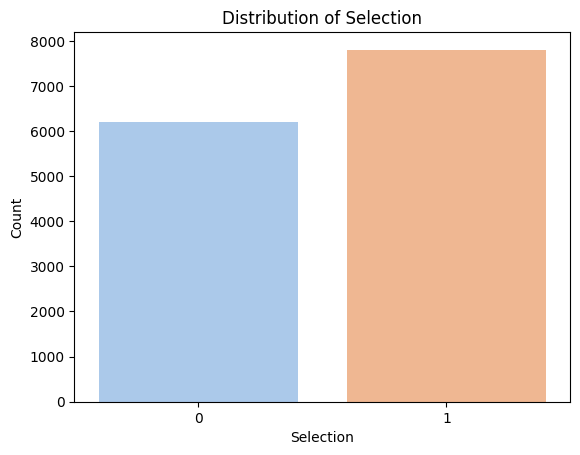

In [39]:
# Print the count of each unique value in the 'selection' column
print(train['selection'].value_counts())

# Create a count plot to visualize the distribution of 'selection' values
sns.countplot(data=train, x='selection', palette='pastel')

# Set plot labels and title
plt.xlabel('Selection')
plt.ylabel('Count')
plt.title('Distribution of Selection')

# Show the plot
plt.show()

The data seems pretty much balanced i.e. There is not a significant difference between the count of the target variable values.

gender
M    6992
F    6983
Name: count, dtype: int64


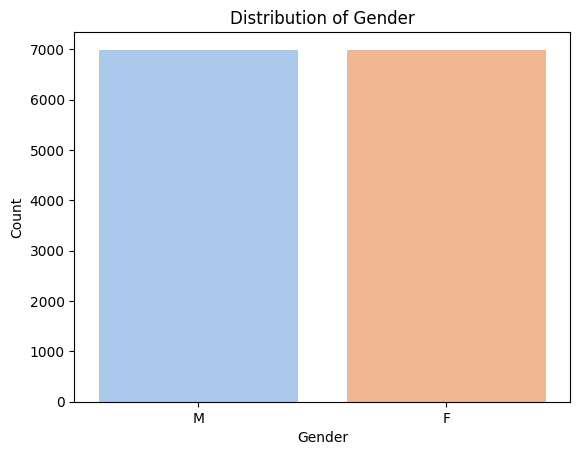

In [40]:
# Print the count of each unique value in the 'gender' column
print(train['gender'].value_counts())

# Create a count plot to visualize the distribution of 'gender' values
sns.countplot(data=train, x='gender', palette='pastel')

# Set plot labels and title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Distribution of Gender')

# Show the plot
plt.show()

strong_foot
Right    8359
Left     2531
Any      1271
Name: count, dtype: int64


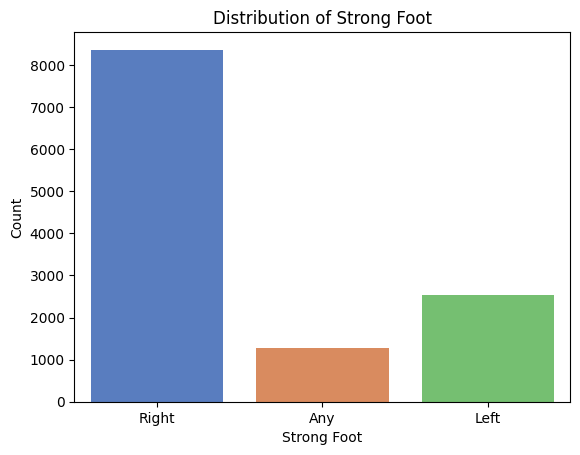

In [41]:
# Print the count of each unique value in the 'strong_foot' column
print(train['strong_foot'].value_counts())

# Create a count plot to visualize the distribution of 'gender' values
sns.countplot(data=train, x='strong_foot', palette='muted')

# Set plot labels and title
plt.xlabel('Strong Foot')
plt.ylabel('Count')
plt.title('Distribution of Strong Foot')

# Show the plot
plt.show()

dedication_level
Medium    9704
High      3557
Low        733
Name: count, dtype: int64


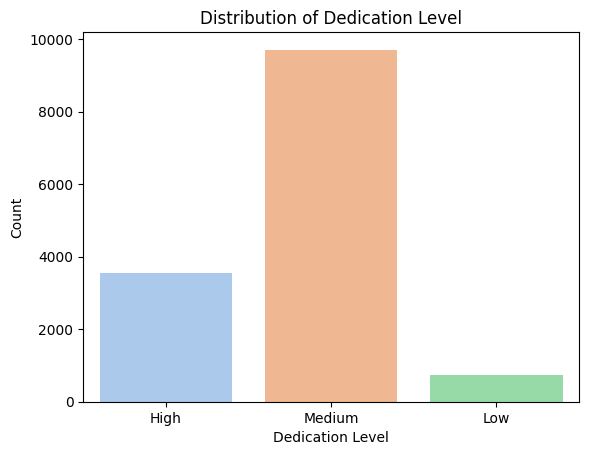

In [42]:
# Print the count of each unique value in the 'dedication_level' column
print(train['dedication_level'].value_counts())

# Create a count plot to visualize the distribution of 'gender' values
sns.countplot(data=train, x='dedication_level', palette='pastel')

# Set plot labels and title
plt.xlabel('Dedication Level')
plt.ylabel('Count')
plt.title('Distribution of Dedication Level')

# Show the plot
plt.show()

coaching
Academy        9390
Talent Hunt    1993
Unknown        1360
Source         1126
Name: count, dtype: int64


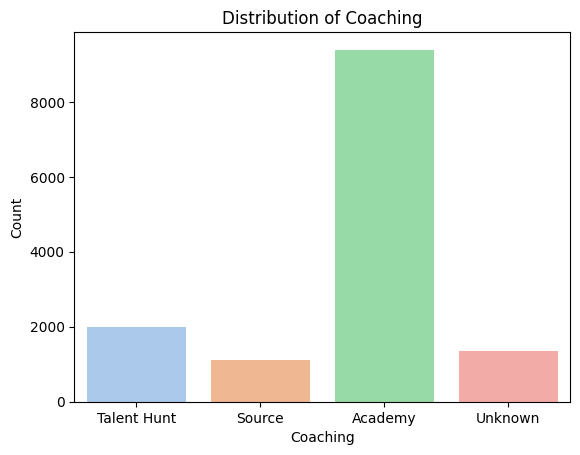

In [43]:
# Print the count of each unique value in the 'coaching' column
print(train['coaching'].value_counts())

# Create a count plot to visualize the distribution of 'coaching' values
sns.countplot(data=train, x='coaching', palette='pastel')

# Set plot labels and title
plt.xlabel('Coaching')
plt.ylabel('Count')
plt.title('Distribution of Coaching')

# Show the plot
plt.show()

### 5.2 [Data Imputation for Handling Missing Values](#0)

In [44]:
# Count and display the number of missing values in each column of the 'train' dataset
train.isna().sum()

player_id                       0
name                            0
age                             0
gender                         19
country                         0
height                          0
weight                        417
ball_controlling_skills       413
body_reflexes                   0
body_balance                    0
jumping_skills                 24
penalties_conversion_rate      30
mental_strength                28
goalkeeping_skills              0
defending_skills                0
passing_skills                  0
dribbling_skills                0
shot_accuracy                 572
body_strength_stamina           0
max_running_speed               0
strong_foot                  1833
behaviour_rating              703
matches_played                666
fitness_rating                695
trophies_won                    0
dedication_level                0
coaching                      125
years_of_experience           144
no_of_disqualifications         0
selection     

In [45]:
# Calculate the number of missing values in each column in train dataset
train.isna().sum()/ len(train) * 100

player_id                     0.000000
name                          0.000000
age                           0.000000
gender                        0.135772
country                       0.000000
height                        0.000000
weight                        2.979849
ball_controlling_skills       2.951265
body_reflexes                 0.000000
body_balance                  0.000000
jumping_skills                0.171502
penalties_conversion_rate     0.214378
mental_strength               0.200086
goalkeeping_skills            0.000000
defending_skills              0.000000
passing_skills                0.000000
dribbling_skills              0.000000
shot_accuracy                 4.087466
body_strength_stamina         0.000000
max_running_speed             0.000000
strong_foot                  13.098471
behaviour_rating              5.023582
matches_played                4.759183
fitness_rating                4.966414
trophies_won                  0.000000
dedication_level         

In [46]:
# Removing the 'name,' 'country,' and 'matches_played' columns from both the 'train' and 'test' datasets
# These columns are not relevant for selecting the right sports person.
train.drop(['name', 'country', 'matches_played'], axis=1, inplace=True)
test.drop(['name', 'country', 'matches_played'], axis=1, inplace=True)

In [47]:
# Replace single quotation marks with periods in the 'height' column and convert it to numeric for the 'train' dataset
train['height'] = train['height'].str.replace("'", '.')
train['height'] = pd.to_numeric(train['height'])

# Replace single quotation marks with periods in the 'height' column and convert it to numeric for the 'test' dataset
test['height'] = test['height'].str.replace("'", '.')
test['height'] = pd.to_numeric(test['height'])

In [48]:
# Extract the weight values from strings, remove 'lbs,' and convert to numeric
train['weight'] = train['weight'].str.split("lbs", expand=True)[0]
train['weight'] = pd.to_numeric(train['weight'])

test['weight']=test['weight'].str.split("lbs",expand=True)[0]
test['weight'] = pd.to_numeric(test['weight'])

In [49]:
# Check and print data types for all columns in the 'train' dataset
train.dtypes

player_id                     object
age                            int64
gender                        object
height                       float64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
years_of_experience          float64
no_of_disqualifications      float64
selection                      int64
d

In [50]:
# Check and print data types for all columns in the 'test' dataset
test.dtypes

player_id                     object
age                            int64
gender                        object
height                       float64
weight                       float64
ball_controlling_skills      float64
body_reflexes                float64
body_balance                 float64
jumping_skills               float64
penalties_conversion_rate    float64
mental_strength              float64
goalkeeping_skills           float64
defending_skills             float64
passing_skills               float64
dribbling_skills             float64
shot_accuracy                float64
body_strength_stamina        float64
max_running_speed            float64
strong_foot                   object
behaviour_rating             float64
fitness_rating               float64
trophies_won                 float64
dedication_level              object
coaching                      object
years_of_experience          float64
no_of_disqualifications      float64
dtype: object

In [51]:
# Display the first few rows of the 'train' dataset to inspect the data
train.head()

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,23,M,6.20,176.0,77.0,58.0,47.0,59.0,41.0,...,24.4,Right,7.7,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,18,M,5.10,148.0,54.0,69.0,70.0,62.0,53.0,...,22.6,Any,5.3,NaN,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,16,F,6.20,172.0,34.0,43.0,45.0,69.0,49.0,...,23.2,Left,4.7,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,27,M,5.11,165.0,79.0,73.0,76.0,86.0,81.0,...,21.2,Right,8.6,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,19,F,5.80,158.0,47.0,61.0,74.0,57.0,49.0,...,23.4,Right,NaN,5.7,5.0,Medium,Academy,4.0,0.0,0


In [52]:
# Fill missing values in the 'weight' column with the mean value for the 'train' dataset
train['weight'] = train['weight'].fillna(train['weight'].mean())

# Fill missing values in the 'weight' column with the mean value for the 'test' dataset
test['weight'] = test['weight'].fillna(test['weight'].mean())

In [53]:
# Fill missing values in the 'ball_controlling_skills' column with the median value for the 'train' dataset
train['ball_controlling_skills'] = train['ball_controlling_skills'].fillna(train['ball_controlling_skills'].median())

# Fill missing values in the 'ball_controlling_skills' column with the median value for the 'test' dataset
test['ball_controlling_skills'] = test['ball_controlling_skills'].fillna(test['ball_controlling_skills'].median())

In [54]:
# Fill missing values in the 'jumping_skills' column with the median value for the 'train' dataset
train['jumping_skills'] = train['jumping_skills'].fillna(train['jumping_skills'].median())

# Fill missing values in the 'jumping_skills' column with the median value for the 'test' dataset
test['jumping_skills'] = test['jumping_skills'].fillna(test['jumping_skills'].median())

In [55]:
# Fill missing values in the 'penalties_conversion_rate' column with the median value for the 'train' dataset
train['penalties_conversion_rate'] = train['penalties_conversion_rate'].fillna(train['penalties_conversion_rate'].median())

# Fill missing values in the 'penalties_conversion_rate' column with the median value for the 'test' dataset
test['penalties_conversion_rate'] = test['penalties_conversion_rate'].fillna(test['penalties_conversion_rate'].median())

In [56]:
# Fill missing values in the 'mental_strength' column with the mean value for the 'train' dataset
train['mental_strength'] = train['mental_strength'].fillna(train['mental_strength'].mean())

# Fill missing values in the 'mental_strength' column with the mean value for the 'test' dataset
test['mental_strength'] = test['mental_strength'].fillna(test['mental_strength'].mean())

In [57]:
# Fill missing values in the 'shot_accuracy' column with the median value for the 'train' dataset
train['shot_accuracy'] = train['shot_accuracy'].fillna(train['shot_accuracy'].median())

# Fill missing values in the 'shot_accuracy' column with the median value for the 'test' dataset
test['shot_accuracy'] = test['shot_accuracy'].fillna(test['shot_accuracy'].median())

In [58]:
# Fill missing values in the 'behaviour_rating' column with the median value for the 'train' dataset
train['behaviour_rating'] = train['behaviour_rating'].fillna(train['behaviour_rating'].median())

# Fill missing values in the 'behaviour_rating' column with the median value for the 'test' dataset
test['behaviour_rating'] = test['behaviour_rating'].fillna(test['behaviour_rating'].median())

In [59]:
# Fill missing values in the 'fitness_rating' column with the median value for the 'train' dataset
train['fitness_rating'] = train['fitness_rating'].fillna(train['fitness_rating'].median())

# Fill missing values in the 'fitness_rating' column with the median value for the 'test' dataset
test['fitness_rating'] = test['fitness_rating'].fillna(test['fitness_rating'].median())

In [60]:
# Fill missing values in the 'years_of_experience' column with the median value for the 'train' dataset
train['years_of_experience'] = train['years_of_experience'].fillna(train['years_of_experience'].median())

# Fill missing values in the 'years_of_experience' column with the median value for the 'test' dataset
test['years_of_experience'] = test['years_of_experience'].fillna(test['years_of_experience'].median())

In [61]:
# Find and print the mode (most frequent value) of the 'gender' column in the 'train' dataset
print("Mode of 'gender' column in the train dataset:", train['gender'].mode())

# Find and print the mode (most frequent value) of the 'gender' column in the 'test' dataset
print("Mode of 'gender' column in the test dataset:", test['gender'].mode())

Mode of 'gender' column in the train dataset: 0    M
Name: gender, dtype: object
Mode of 'gender' column in the test dataset: 0    M
Name: gender, dtype: object


In [62]:
# Fill missing values in the 'gender' column with the mode (most frequent value) for the 'train' dataset
train['gender'] = train['gender'].fillna(train['gender'].mode()[0])

# Fill missing values in the 'gender' column with the mode (most frequent value) for the 'test' dataset
test['gender'] = test['gender'].fillna(test['gender'].mode()[0])

In [63]:
# Find and print the mode (most frequent value) of the 'strong_foot' column in the 'train' dataset
print("Mode of 'strong_foot' column in the train dataset:", train['strong_foot'].mode())

# Find and print the mode (most frequent value) of the 'strong_foot' column in the 'test' dataset
print("Mode of 'strong_foot' column in the test dataset:", test['strong_foot'].mode())

Mode of 'strong_foot' column in the train dataset: 0    Right
Name: strong_foot, dtype: object
Mode of 'strong_foot' column in the test dataset: 0    Right
Name: strong_foot, dtype: object


In [64]:
# Fill missing values in the 'strong_foot' column with the mode (most frequent value) for the 'train' dataset
train['strong_foot'] = train['strong_foot'].fillna(train['strong_foot'].mode()[0])

# Fill missing values in the 'strong_foot' column with the mode (most frequent value) for the 'test' dataset
test['strong_foot'] = test['strong_foot'].fillna(test['strong_foot'].mode()[0])

In [65]:
# Find and print the mode (most frequent value) of the 'coaching' column in the 'train' dataset
print("Mode of 'coaching' column in the train dataset:", train['coaching'].mode())

# Find and print the mode (most frequent value) of the 'coaching' column in the 'test' dataset
print("Mode of 'coaching' column in the test dataset:", test['coaching'].mode())

Mode of 'coaching' column in the train dataset: 0    Academy
Name: coaching, dtype: object
Mode of 'coaching' column in the test dataset: 0    Academy
Name: coaching, dtype: object


In [66]:
# Fill missing values in the 'coaching' column with the mode (most frequent value) for the 'train' dataset
train['coaching'] = train['coaching'].fillna(train['coaching'].mode()[0])

# Fill missing values in the 'coaching' column with the mode (most frequent value) for the 'test' dataset
test['coaching'] = test['coaching'].fillna(test['coaching'].mode()[0])

In [67]:
# Check and count missing values in the 'train' dataset
missing_values_train = train.isna().sum()

# Check and count missing values in the 'test' dataset
missing_values_test = test.isna().sum()

# Print the missing values in both datasets
print("Missing values in the train dataset:", '\n')
print(missing_values_train, '\n\n')

print("Missing values in the test dataset:", '\n')
print(missing_values_test)

Missing values in the train dataset: 

player_id                    0
age                          0
gender                       0
height                       0
weight                       0
ball_controlling_skills      0
body_reflexes                0
body_balance                 0
jumping_skills               0
penalties_conversion_rate    0
mental_strength              0
goalkeeping_skills           0
defending_skills             0
passing_skills               0
dribbling_skills             0
shot_accuracy                0
body_strength_stamina        0
max_running_speed            0
strong_foot                  0
behaviour_rating             0
fitness_rating               0
trophies_won                 0
dedication_level             0
coaching                     0
years_of_experience          0
no_of_disqualifications      0
selection                    0
dtype: int64 


Missing values in the test dataset: 

player_id                    0
age                          0
gender  

In [68]:
# Check and count duplicate rows in the 'train' dataset
duplicate_rows_train = train.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows in the train dataset:", duplicate_rows_train)

Number of duplicate rows in the train dataset: 0


In [69]:
# Check and count duplicate rows in the 'test' dataset
duplicate_rows_test = test.duplicated().sum()

# Print the number of duplicate rows
print("Number of duplicate rows in the test dataset:", duplicate_rows_test)

Number of duplicate rows in the test dataset: 0


In [70]:
# Display the first few rows of the 'train' dataset to inspect the data
train.head()

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications,selection
0,PLID_4964,23,M,6.20,176.0,77.0,58.0,47.0,59.0,41.0,...,24.4,Right,7.7,8.1,2.0,High,Talent Hunt,8.0,0.0,1
1,PLID_11234,18,M,5.10,148.0,54.0,69.0,70.0,62.0,53.0,...,22.6,Any,5.3,6.8,3.0,Medium,Source,3.0,0.0,0
2,PLID_19127,16,F,6.20,172.0,34.0,43.0,45.0,69.0,49.0,...,23.2,Left,4.7,6.6,5.0,Low,Academy,2.0,0.0,1
3,PLID_17467,27,M,5.11,165.0,79.0,73.0,76.0,86.0,81.0,...,21.2,Right,8.6,8.6,6.0,Medium,Academy,13.0,16.0,1
4,PLID_9661,19,F,5.80,158.0,47.0,61.0,74.0,57.0,49.0,...,23.4,Right,5.9,5.7,5.0,Medium,Academy,4.0,0.0,0


In [71]:
# Display the first few rows of the 'test' dataset to inspect the data
test.head()

,player_id,age,gender,height,weight,ball_controlling_skills,body_reflexes,body_balance,jumping_skills,penalties_conversion_rate,...,body_strength_stamina,max_running_speed,strong_foot,behaviour_rating,fitness_rating,trophies_won,dedication_level,coaching,years_of_experience,no_of_disqualifications
0,PLID_14644,16,F,6.1,163.0,68.0,68.0,54.0,67.0,42.0,...,71.0,25.6,Right,6.5,7.7,3.0,Medium,Unknown,1.0,0.0
1,PLID_5934,23,F,5.9,170.0,65.0,73.0,78.0,92.0,49.0,...,64.0,27.6,Right,5.1,6.1,3.0,Medium,Academy,9.0,0.0
2,PLID_5074,18,F,5.1,154.0,72.0,79.0,64.0,37.0,64.0,...,70.0,29.4,Left,5.8,8.4,2.0,Medium,Academy,3.0,0.0
3,PLID_17357,24,F,6.0,168.0,64.0,76.0,65.0,65.0,39.0,...,60.0,23.0,Right,5.2,6.2,6.0,High,Academy,10.0,0.0
4,PLID_13993,20,F,6.0,163.0,53.0,58.0,57.0,66.0,36.0,...,66.0,23.2,Right,4.7,6.9,3.0,Medium,Talent Hunt,5.0,0.0


### 5.3 [Label Encoding](#0)

In [72]:
# Initialize a LabelEncoder for encoding categorical labels to numerical values
le = LabelEncoder()

In [73]:
# Use LabelEncoder to transform and encode categorical features in the 'train' dataset
train['gender'] = le.fit_transform(train['gender'])
train['strong_foot'] = le.fit_transform(train['strong_foot'])
train['dedication_level'] = le.fit_transform(train['dedication_level'])
train['coaching'] = le.fit_transform(train['coaching'])

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

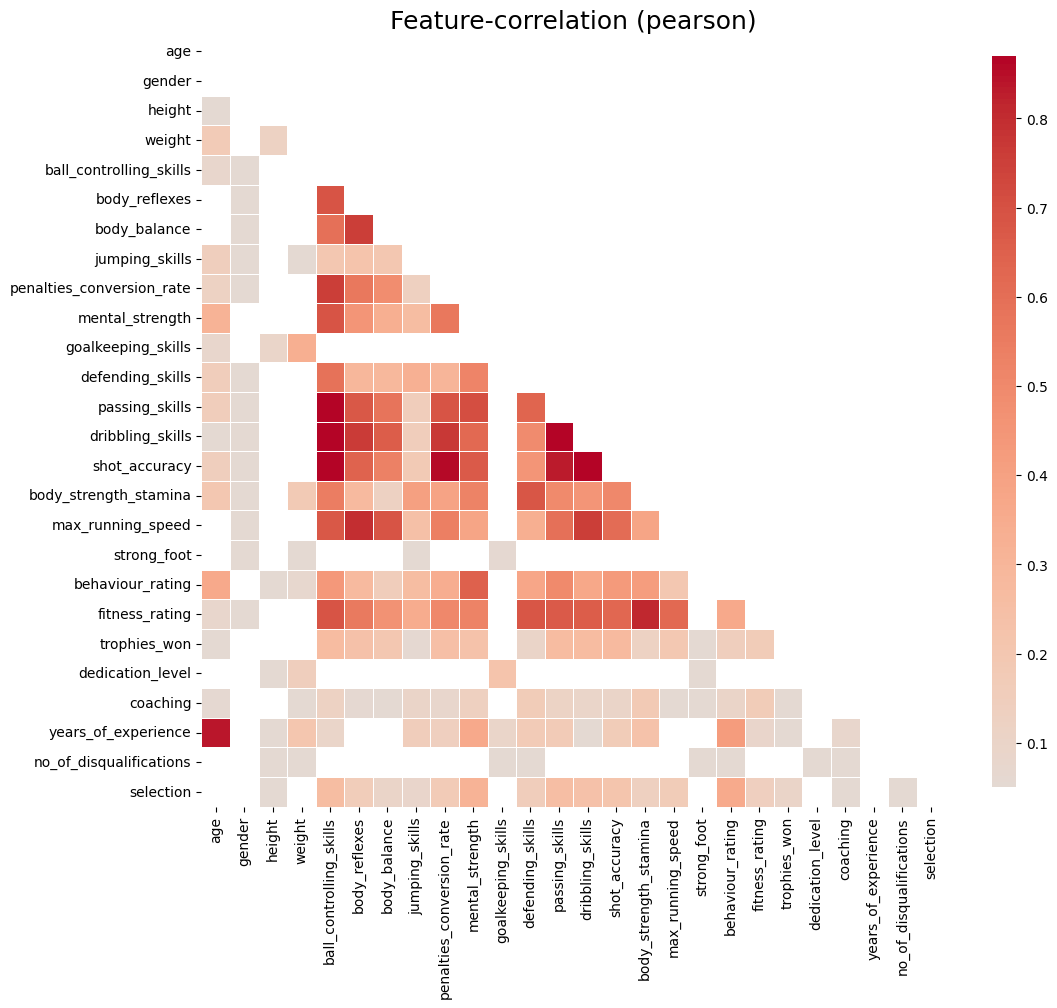

In [74]:
# Define the desired colormap
cmap = 'coolwarm'

# Generate the correlation plot for positive correlations
klib.corr_plot(train, split='pos', cmap=cmap)

Displaying negative correlations. Specify a negative "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

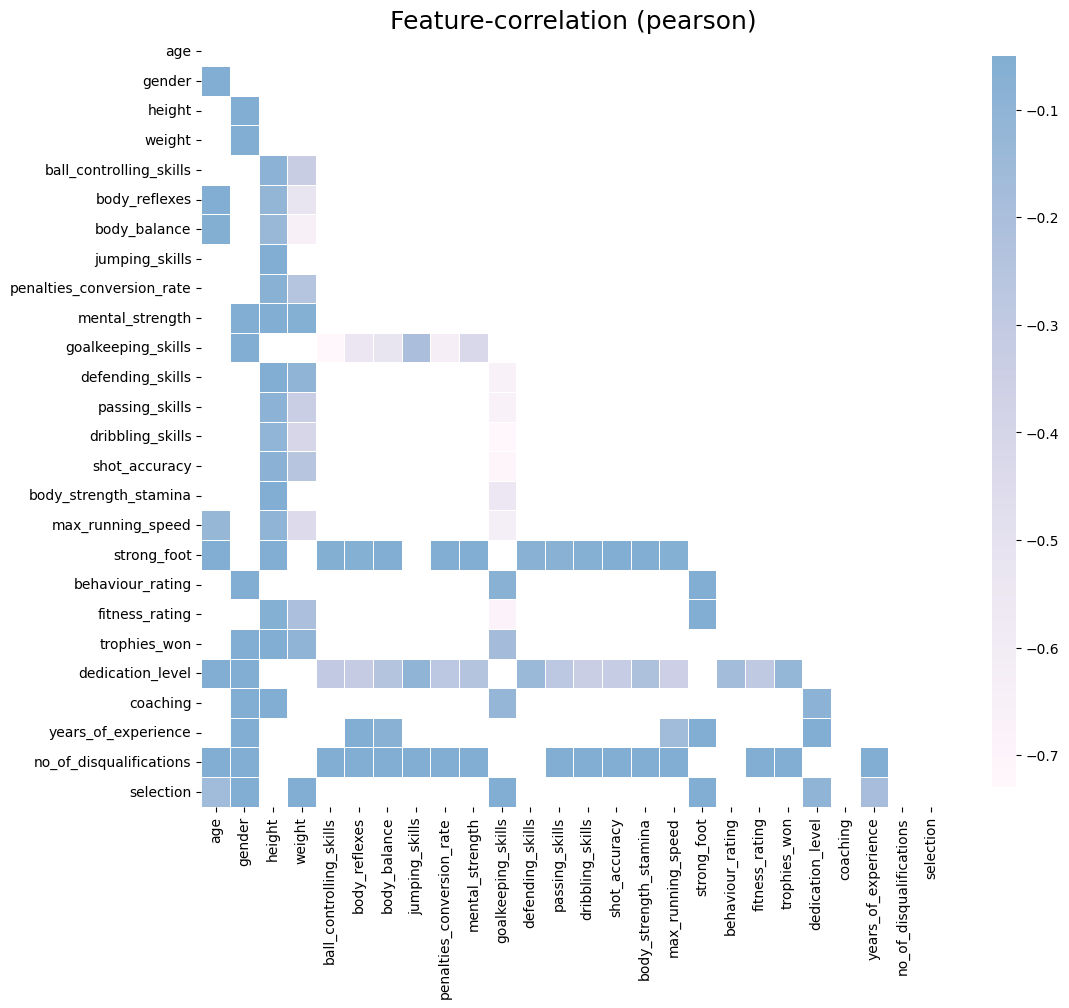

In [75]:
# Define the desired colormap
cmap = 'PuBu'

# Generate the correlation plot for negatuive correlations
klib.corr_plot(train, split='neg', cmap=cmap)

In [76]:
# Use LabelEncoder to transform and encode categorical features in the 'test' dataset
test['gender'] = le.fit_transform(test['gender'])
test['strong_foot'] = le.fit_transform(test['strong_foot'])
test['dedication_level'] = le.fit_transform(test['dedication_level'])
test['coaching'] = le.fit_transform(test['coaching'])

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

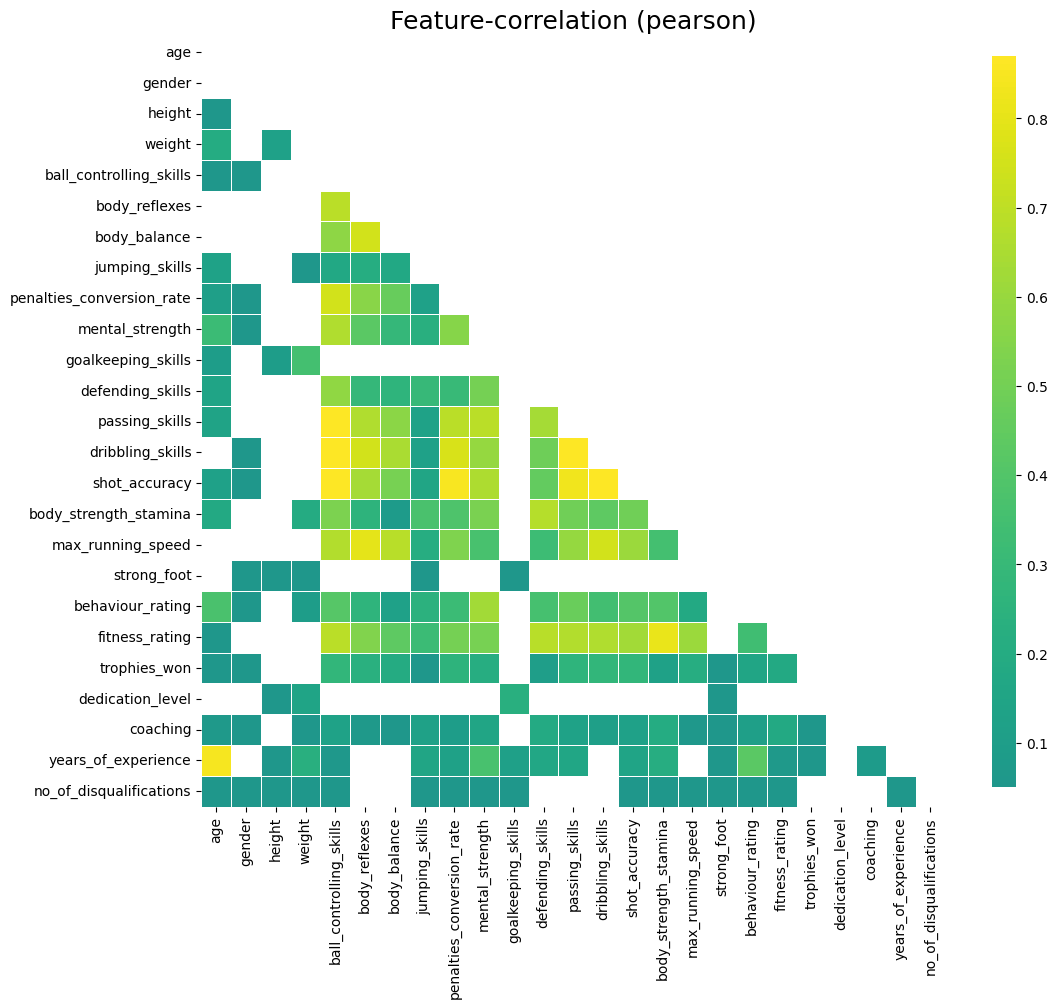

In [77]:
# Define the desired colormap
cmap = 'viridis'

# Generate the correlation plot for positive correlations
klib.corr_plot(test, split='pos', cmap=cmap)

Displaying positive correlations. Specify a positive "threshold" to limit the results further.


<Axes: title={'center': 'Feature-correlation (pearson)'}>

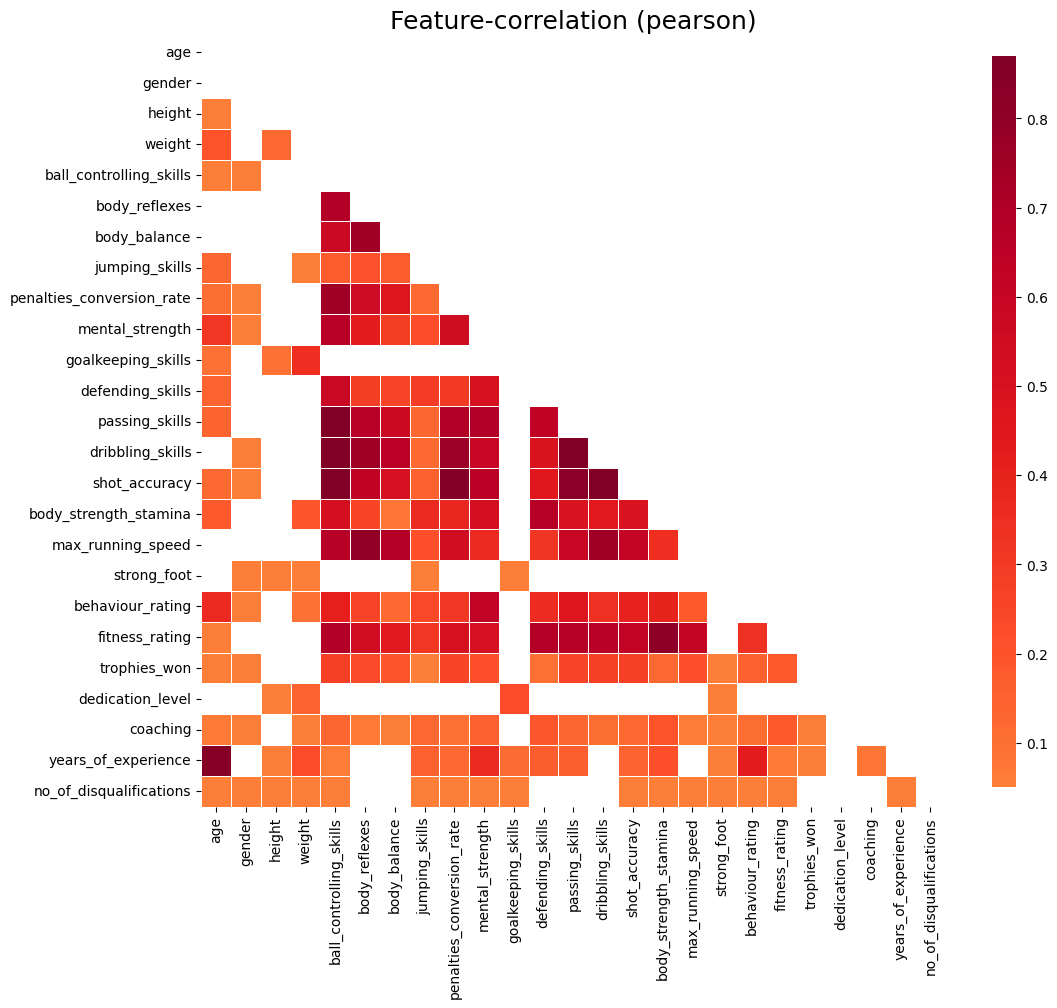

In [78]:
# Define the desired colormap
cmap = 'YlOrRd'

# Generate the correlation plot for positive correlations
klib.corr_plot(test, split='pos', cmap=cmap)

### 5.4 [Data Splitting](#0)

In [79]:
# Split the data into features (X) and the target variable (y)
X = train.drop(['player_id','selection'], axis=1)  # Features
y = train['selection']  # Target variable

# Split the data into training and testing sets, ensuring stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

<a name='6'></a>
### 6. [Model Building and Evaluation](#6)

### 1. Logistic Regression

In [80]:
# Create a Logistic Regression model
lr = LogisticRegression()

# Train the model on the training data
lr_model = lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr_model.predict(X_test)

In [81]:
# Calculate and print the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is:', accuracy)

Accuracy is: 0.7513397642015005


In [82]:
# Generate a classification report to assess model performance
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.74      0.68      0.71      1238
           1       0.76      0.81      0.78      1561

    accuracy                           0.75      2799
   macro avg       0.75      0.74      0.75      2799
weighted avg       0.75      0.75      0.75      2799



### 2. KNN Classifier

In [83]:
# Initialize an empty list to store accuracy scores
lst_acc = []

# Iterate through different values of K (number of neighbors)
for i in range(5, 16, 2):                      # Values of K: 5, 7, 9, ...
    knn = KNeighborsClassifier(n_neighbors=i)  # Create a KNN classifier with the current K
    
    # Convert sparse matrices to dense arrays
    X_train_dense = X_train.toarray() if hasattr(X_train, 'toarray') else np.array(X_train)
    X_test_dense = X_test.toarray() if hasattr(X_test, 'toarray') else np.array(X_test)
    
    # Train the model on the training data
    knn.fit(X_train_dense, y_train)
    
    # Make predictions on the testing data
    y_pred = knn.predict(X_test_dense)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    
    # Append accuracy to the list
    lst_acc.append(acc)

# Now you can access the accuracy scores for analysis
print(lst_acc)

[0.7420507324044302, 0.7527688460164345, 0.759199714183637, 0.7624151482672383, 0.76670239371204, 0.7649160414433727]


In [84]:
# Create a KNN classifier with 9 neighbors
knn = KNeighborsClassifier(n_neighbors=9)

# Convert sparse matrices to dense arrays if necessary
if hasattr(X_train, 'toarray'):
    X_train_dense = X_train.toarray()
    X_test_dense = X_test.toarray()
else:
    X_train_dense = np.array(X_train)
    X_test_dense = np.array(X_test)

# Train the KNN model on the training data
knn_model = knn.fit(X_train_dense, y_train)

# Make predictions on the testing data
y_pred = knn_model.predict(X_test_dense)

# Calculate and print the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is:', accuracy)

Accuracy is: 0.759199714183637


In [85]:
# Generate a classification report to assess model performance
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1238
           1       0.79      0.78      0.78      1561

    accuracy                           0.76      2799
   macro avg       0.76      0.76      0.76      2799
weighted avg       0.76      0.76      0.76      2799



### 3. SVC

In [86]:
# Create an SVM classifier
svc = SVC()

# Train the SVM model on the training data
svc_model = svc.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svc_model.predict(X_test)

# Calculate and print the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is:', accuracy)

Accuracy is: 0.7920685959271169


In [87]:
# Generate a classification report to assess model performance
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.76      0.78      0.77      1238
           1       0.82      0.81      0.81      1561

    accuracy                           0.79      2799
   macro avg       0.79      0.79      0.79      2799
weighted avg       0.79      0.79      0.79      2799



### 4. Desicion Tree Classifier

In [88]:
# Create a Decision Tree classifier
dt = DecisionTreeClassifier()

# Train the Decision Tree model on the training data
dt_model = dt.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = dt_model.predict(X_test)

# Calculate and print the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is:', accuracy)

Accuracy is: 0.789210432297249


In [89]:
# Generate a classification report to assess model performance
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.77      0.74      0.76      1238
           1       0.80      0.83      0.81      1561

    accuracy                           0.79      2799
   macro avg       0.79      0.78      0.79      2799
weighted avg       0.79      0.79      0.79      2799



### 5. Random Forest Classifier

In [90]:
# Create a Random Forest classifier
rf = RandomForestClassifier()

# Train the Random Forest model on the training data
rf_model = rf.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = rf_model.predict(X_test)

# Calculate and print the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy is:', accuracy)

Accuracy is: 0.8656663093962129


In [91]:
# Generate a classification report to assess model performance
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1238
           1       0.88      0.88      0.88      1561

    accuracy                           0.87      2799
   macro avg       0.86      0.86      0.86      2799
weighted avg       0.87      0.87      0.87      2799



Not bad, we are getting approx 87% accuracy with all the variables. Let's see how much we can get with lesser features.

### Model Building Using Recursive Feature Elimination (RFE)

In this step, we'll construct a model by employing Recursive Feature Elimination (RFE). The goal is to select a subset of important features for our model. We will begin by selecting an arbitrary number of features and then utilize the `statsmodels` library to create models using the shortlisted features. We use 'statsmodels' because it provides metrics like adjusted R-squared, which are not readily available in 'sklearn'.

This process allows us to iteratively identify the most influential features, optimizing the model's performance by including only those features that contribute significantly to the predictive power of the model.


In [92]:
# Creating a Random Forest classifier
rf = RandomForestClassifier()

# Creating an RFE (Recursive Feature Elimination) object to select 15 features
rfe_15 = RFE(rf, n_features_to_select=15)

# Fit RFE with 15 features to the training data
rfe_15.fit(X_train, y_train)

# Printing the ranking of features based on their importance
print(rfe_15.ranking_)

[ 1 11  5  1  1  1  4  2  1  1  1  1  1  1  1  1  1  9  1  3  6 10  8  1
  7]


In [93]:
# Making predictions using the RFE model with 15 selected features
y_pred = rfe_15.predict(X_test)

# Printing the classification report to evaluate the model's performance
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1238
           1       0.88      0.88      0.88      1561

    accuracy                           0.86      2799
   macro avg       0.86      0.86      0.86      2799
weighted avg       0.86      0.86      0.86      2799



In [94]:
# Calculate the accuracy of the model's predictions
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy score
print('Accuracy is:', accuracy)

Accuracy is: 0.8638799571275455


### 6. XGBoost Classifier

In [95]:
# Create an XGBoost classifier
xgb = xgb.XGBClassifier()

# Fit the classifier to the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred_xgb = xgb.predict(X_test)

# Calculate the accuracy of the XGBoost model's predictions
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Print the accuracy
print('XGBoost Accuracy:', accuracy_xgb)

XGBoost Accuracy: 0.8585209003215434


In [96]:
# Generate a classification report to assess model performance
report = classification_report(y_test, y_pred)

# Print the classification report
print(report)

              precision    recall  f1-score   support

           0       0.85      0.85      0.85      1238
           1       0.88      0.88      0.88      1561

    accuracy                           0.86      2799
   macro avg       0.86      0.86      0.86      2799
weighted avg       0.86      0.86      0.86      2799



### Cross Validation

In [97]:
# Create a Stratified K-Fold cross-validation object with 10 folds
skfold_validator = StratifiedKFold(n_splits=10)

In [98]:
# For logistic regression model
# Perform cross-validation using the Stratified K-Fold object
skcv_result = cross_val_score(lr_model, X, y, cv=skfold_validator)

# Calculate the mean of the cross-validation results
np.mean(skcv_result)

0.7470332890840397

In [99]:
# For SVC model
# Perform cross-validation using the Stratified K-Fold object
skcv_result = cross_val_score(svc_model, X, y, cv=skfold_validator)

# Calculate the mean of the cross-validation results
np.mean(skcv_result)

0.7874091187582967

In [100]:
# For DT model
# Perform cross-validation using the Stratified K-Fold object
skcv_result = cross_val_score(dt_model, X, y, cv=skfold_validator)

# Calculate the mean of the cross-validation results
np.mean(skcv_result)

0.7923387623812927

In [101]:
# For RF model
# Perform cross-validation using the Stratified K-Fold object
skcv_result = cross_val_score(rf_model, X, y, cv=skfold_validator)

# Calculate the mean of the cross-validation results
np.mean(skcv_result)

0.8575822015725519

In [102]:
# For xgb classifier model
# Perform cross-validation using the Stratified K-Fold object
skcv_result = cross_val_score(xgb, X, y, cv=skfold_validator)

# Calculate the mean of the cross-validation results
np.mean(skcv_result)

0.859010875114878

In our evaluation, we considered various machine learning models, including Random Forest Classifier and XGBoost Classifier. After conducting cross-validation and assessing model performance, we observed that XGBoost consistently achieved the highest accuracy among the models tested. Therefore, we conclude that XGBoost is the best-performing model for our classification task.

### Hyperparameter grid for XGBoost classifier

In [ ]:
# Define the hyperparameter grid for XGBoost
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 4, 5],
    'min_child_weight': [1, 2, 3],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
}

# Create an XGBoost classifier
xgb = XGBClassifier()

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, scoring='accuracy', cv=10)

# Fit the GridSearchCV to your data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model with the optimal hyperparameters
xgb = grid_search.best_estimator_

# Make predictions with the best model
y_pred_best = xgb.predict(X_test)

# Calculate and print the accuracy
accuracy_best = accuracy_score(y_test, y_pred_best)
print("Best Model Accuracy:", accuracy_best)

<a name='7'></a>
### 7. [Predictions](#7)

In [103]:
# Create a copy of the test dataset
Test = test.copy()

In [104]:
# Remove the 'player_id' column from the Test DataFrame
Test = Test.drop('player_id', axis=1)

In [105]:
# We have a trained XGBoost model called 
test_pred = xgb.predict(Test)

# The variable test_pred now contains the predicted labels for the test dataset
print(test_pred)

[1 0 1 ... 1 1 0]


In [106]:
# Add the 'Selection' column to the test DataFrame with predicted values
test['Selection'] = test_pred

In [107]:
# Create a DataFrame 'result' containing 'player_id' and 'Selection' columns
result = test[['player_id', 'Selection']]

In [108]:
# Display the first few rows of the 'result' DataFrame to inspect the predictions
result.head()

,player_id,Selection
0,PLID_14644,1
1,PLID_5934,0
2,PLID_5074,1
3,PLID_17357,0
4,PLID_13993,0


In [109]:
# Save the 'prediction' DataFrame to a CSV file without including the index
result.to_csv('prediction.csv', index=False)

# Display the first few rows of the 'prediction' DataFrame
result.head()

,player_id,Selection
0,PLID_14644,1
1,PLID_5934,0
2,PLID_5074,1
3,PLID_17357,0
4,PLID_13993,0


----